In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Colab Notebooks/5 kinds of flower/training_data/flowers'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Colab Notebooks/5 kinds of flower/training_data/flowers'

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (256,256), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (256,256), batch_size = 10, class_mode = 'categorical')

Found 4235 images belonging to 5 classes.
Found 4235 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9) # lr learning rate : tốc độ học
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset,epochs=20,batch_size=32,validation_data=validation_dataset,verbose=1)


Epoch 1/20
424/424 [==============================] - 2272s 5s/step - loss: 2.1999 - accuracy: 0.4642 - val_loss: 1.0605 - val_accuracy: 0.5872
Epoch 2/20
424/424 [==============================] - 106s 250ms/step - loss: 0.9867 - accuracy: 0.6224 - val_loss: 0.8080 - val_accuracy: 0.6978
Epoch 3/20
424/424 [==============================] - 105s 249ms/step - loss: 0.8797 - accuracy: 0.6720 - val_loss: 0.8070 - val_accuracy: 0.7063
Epoch 4/20
424/424 [==============================] - 105s 247ms/step - loss: 0.8151 - accuracy: 0.7011 - val_loss: 0.9426 - val_accuracy: 0.6864
Epoch 5/20
424/424 [==============================] - 105s 248ms/step - loss: 0.7600 - accuracy: 0.7259 - val_loss: 0.6447 - val_accuracy: 0.7665
Epoch 6/20
424/424 [==============================] - 124s 293ms/step - loss: 0.7143 - accuracy: 0.7450 - val_loss: 0.6057 - val_accuracy: 0.7792
Epoch 7/20
424/424 [==============================] - 104s 246ms/step - loss: 0.6821 - accuracy: 0.7577 - val_loss: 0.5855 - v

In [ ]:
model.save('flower5.h5')

In [ ]:
flower5_model = load_model('flower5.h5')

In [ ]:
score=flower5_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

424/424 [==============================] - 23s 55ms/step - loss: 0.3085 - accuracy: 0.8914
Test loss =  0.30849409103393555
Test accuracy =  0.8913813233375549


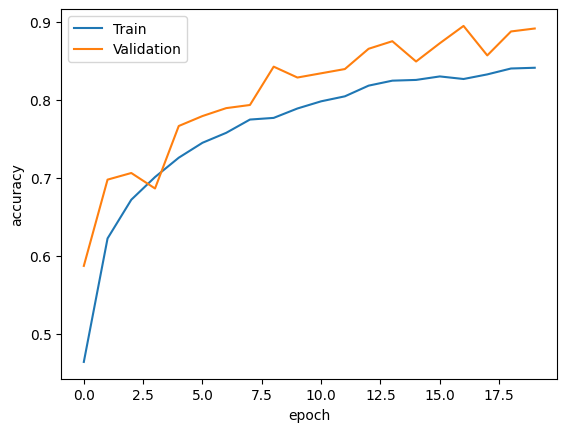

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 370ms/step
Predict is:  daisy


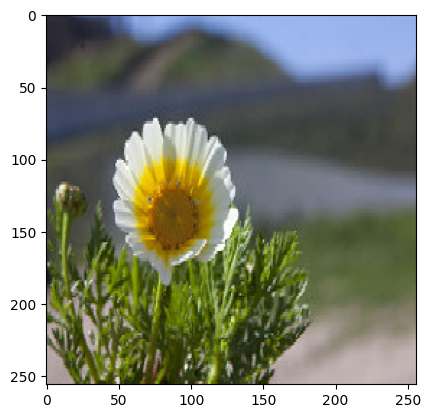

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/5 kinds of flower/testing_data/daisy/daisy.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['daisy','rose','sunflower','tulip','dandelion']
print('Predict is: ',Label[int(np.argmax(flower5_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 29ms/step
Predict is:  rose


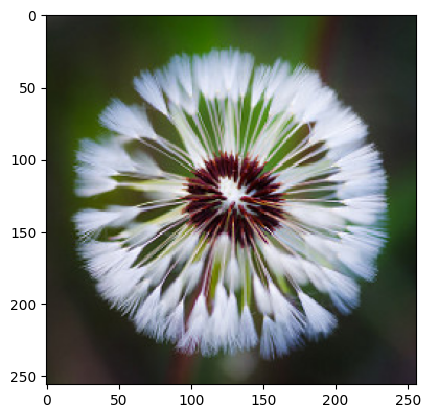

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/5 kinds of flower/testing_data/dandelion/dandelion.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['daisy','rose','sunflower','tulip','dandelion']
print('Predict is: ',Label[int(np.argmax(flower5_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 58ms/step
Predict is:  dandelion


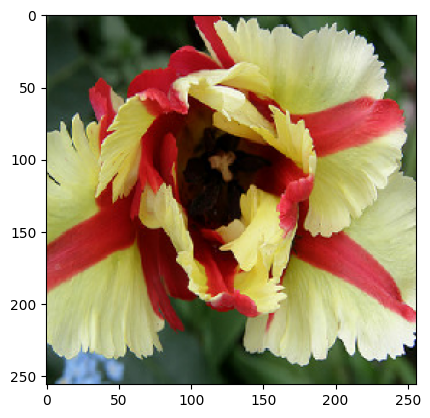

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/5 kinds of flower/testing_data/tulip/tulip.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['daisy','rose','sunflower','tulip','dandelion']
print('Predict is: ',Label[int(np.argmax(flower5_model.predict(img),axis=-1))])